In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
#import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  
#from keras.utils import to_categorical
from keras.models import Sequential, load_model #batchmodel
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
import os

In [3]:
os.getcwd()

'/Users/ujjwalhendwe/Desktop/sixsem/CI Minor project/project'

In [4]:
os.getcwd()

'/Users/ujjwalhendwe/Desktop/sixsem/CI Minor project/project'

In [11]:
cd Train

/Users/ujjwalhendwe/Desktop/sixsem/CI Minor project/project/dataset_big/Train


In [13]:
os.listdir()
os.remove(".DS_store")

In [8]:
cd ../

/Users/ujjwalhendwe/Desktop/sixsem/CI Minor project/project/dataset_big


In [14]:
# loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [41]:
cd /Users/ujjwalhendwe/Desktop/sixsem/CI Minor project/project/dataset_big

/Users/ujjwalhendwe/Desktop/sixsem/CI Minor project/project/dataset_big


In [42]:
test_dataset=pd.read_csv('/Users/ujjwalhendwe/Desktop/sixsem/CI Minor project/project/dataset_big/Test.csv',usecols=['ClassId','Path','Width','Height'],)
test_label=test_dataset['ClassId'].values
test_data=[]

for i in test_dataset['Path'].values:
    img = cv2.imread(i,-1)
    #print(i)
    img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
    test_data.append(np.array(img))

test_data=np.array(test_data)
test_label=np.array(test_label)

print(test_data.shape,test_label.shape)

<built-in function getcwd>
(12630, 30, 30, 3) (12630,)


In [70]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [71]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [72]:
y_train.shape, y_test.shape

((31367, 43), (7842, 43))

In [20]:
train_data=pd.read_csv('/Users/ujjwalhendwe/Desktop/sixsem/CI Minor project/project/dataset_big/Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('/Users/ujjwalhendwe/Desktop/sixsem/CI Minor project/project/dataset_big/Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head(

,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [21]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [22]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [23]:
cd /Users/ujjwalhendwe/Desktop/sixsem/CI Minor project/project/

/Users/ujjwalhendwe/Desktop/sixsem/CI Minor project/project


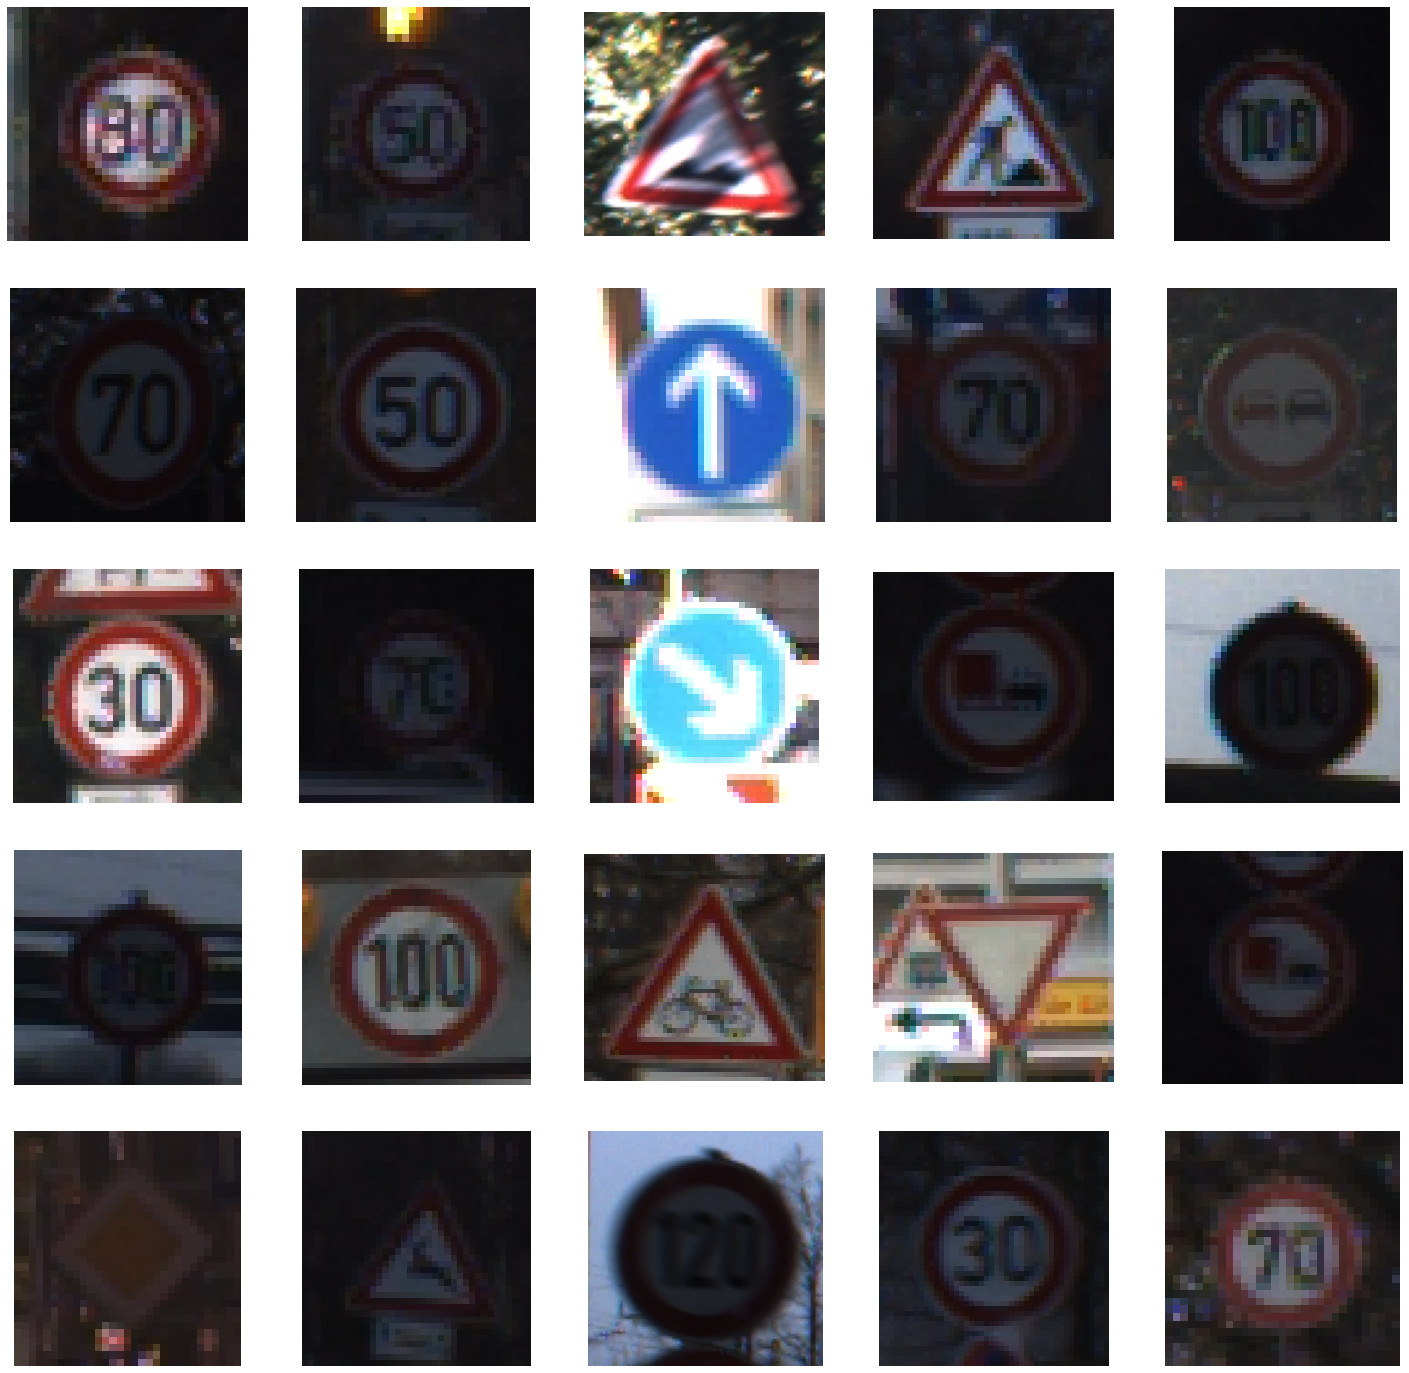

In [24]:
import random
from matplotlib.image import imread
data_dir= os.getcwd()
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path=data_dir+'/dataset_big/'+random.choice(imgs)
    random_image=imread(random_image_path)
    plt.imshow(random_image)
    plt.grid(b=None)
    plt.axis('off')
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)

In [25]:
ls

app.ipynb              dataset_big/           my_model.h5
base-app.ipynb         h1.png                 traffic_classifier.h5


In [26]:
cd dataset_big/Train/

/Users/ujjwalhendwe/Desktop/sixsem/CI Minor project/project/dataset_big/Train


In [27]:
os.remove(".DS_store")

FileNotFoundError: [Errno 2] No such file or directory: '.DS_store'

Text(0, 0.5, 'Number of images')

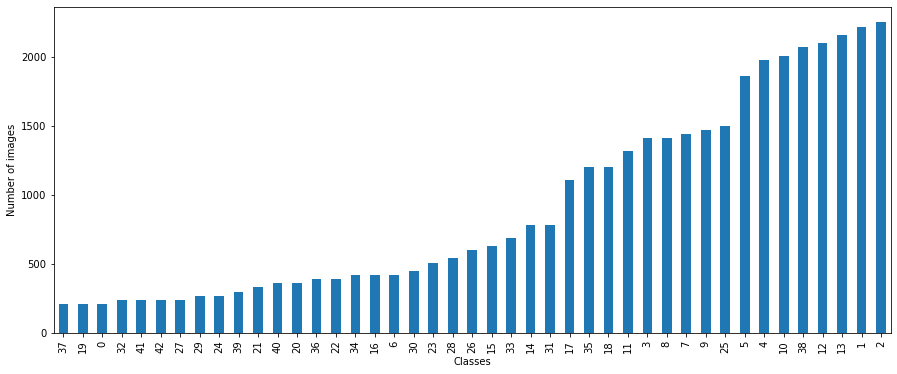

In [28]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [29]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='relu'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [31]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.


In [32]:
import visualkeras

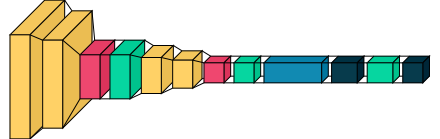

In [33]:
visualkeras.layered_view(model)

In [35]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/20
491/491 [==============================] - 75s 150ms/step - loss: 3.6626 - accuracy: 0.0551 - val_loss: 3.4907 - val_accuracy: 0.0574
Epoch 2/20
491/491 [==============================] - 96s 196ms/step - loss: 3.5002 - accuracy: 0.0567 - val_loss: 3.4840 - val_accuracy: 0.0580
Epoch 3/20
491/491 [==============================] - 96s 196ms/step - loss: 2.6769 - accuracy: 0.2710 - val_loss: 1.1076 - val_accuracy: 0.7094
Epoch 4/20
491/491 [==============================] - 90s 183ms/step - loss: 1.0860 - accuracy: 0.6768 - val_loss: 0.3916 - val_accuracy: 0.8897
Epoch 5/20
491/491 [==============================] - 77s 157ms/step - loss: 0.6722 - accuracy: 0.7997 - val_loss: 0.3797 - val_accuracy: 0.8809
Epoch 6/20
491/491 [==============================] - 75s 153ms/step - loss: 0.5262 - accuracy: 0.8376 - val_loss: 0.2162 - val_accuracy: 0.9346
Epoch 7/20
491/491 [==============================] - 79s 160ms/step - loss: 0.4349 - accuracy: 0.8667 - val_loss: 0.1549 - val_ac

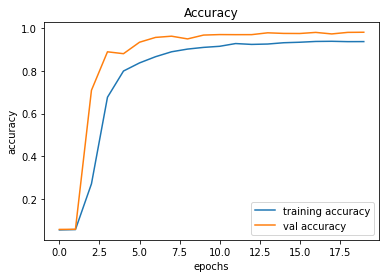

In [36]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

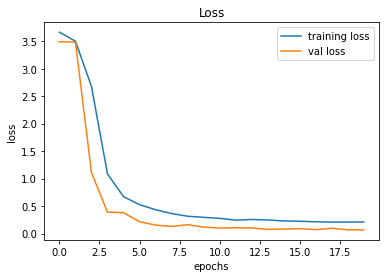

In [37]:

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [38]:
# Score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.06717228144407272
Test accuracy 0.9813823103904724


In [ ]:
y_pred = model.predict(test_data)
y_test_class = np.argmax(test_label,axis=0)
y_pred_class = np.argmax(y_pred,axis=1)

In [73]:
#y_pred = model.predict(X_test)
#y_test_class = np.argmax(y_test,axis=1)
#y_pred_class = np.argmax(y_pred,axis=1)

In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.99      0.95      0.97       442
           2       0.95      0.98      0.97       450
           3       0.99      0.98      0.98       298
           4       0.97      0.96      0.97       395
           5       0.96      0.96      0.96       386
           6       0.99      0.99      0.99        78
           7       0.97      0.98      0.98       310
           8       0.93      0.98      0.96       259
           9       0.99      1.00      0.99       288
          10       1.00      0.99      1.00       373
          11       0.98      0.98      0.98       270
          12       0.99      1.00      0.99       425
          13       0.99      1.00      1.00       416
          14       1.00      1.00      1.00       155
          15       0.99      0.98      0.99       124
          16       1.00      1.00      1.00        72
          17       1.00    

In [76]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

0.9790869676103034

In [77]:
model.save('traffic_sign_recognition.h5')

In [57]:
cd /Users/ujjwalhendwe/Desktop/6th SEM/CI Minor project/project/

/Users/ujjwalhendwe/Desktop/6th SEM/CI Minor project/project


In [58]:
ls

Untitled.ipynb         dataset_big/           traffic_classifier.h5


In [59]:
ls

app.ipynb              dataset_big/           traffic_classifier.h5


In [80]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('/Users/ujjwalhendwe/Desktop/sixsem/CI Minor project/project/traffic_classifier.h5')

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#000000')

label=Label(top,background='#000000', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
#     pred = model.predict_classes([image])[0]
#     pred= (model.predict([image]) > 0.5).astype("int32")[0]
    pred = np.argmax(model.predict([image]), axis=-1)[0]
    print(pred)
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#FFFFFF', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#000000', foreground='black',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/4.25),(top.winfo_height()/4.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=30,pady=10)
upload.configure(background='#000000', foreground='black',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#000000',foreground='#FFFFFF')
heading.pack()
top.mainloop()

33
Turn right ahead
17
No entry
14
Stop
20
Dangerous curve right
13
Yield
34
Turn left ahead
1
Speed limit (30km/h)
13
Yield
14
Stop
16
Veh > 3.5 tons prohibited
11
Right-of-way at intersection
21
Double curve
21
Double curve
25
Road work
26
Traffic signals
41
End of no passing
28
Children crossing
12
Priority road
14
Stop
25
Road work
20
Dangerous curve right
5
Speed limit (80km/h)
18
General caution
39
Keep left
35
Ahead only
23
Slippery road
18
General caution
16
Veh > 3.5 tons prohibited
20
Dangerous curve right
11
Right-of-way at intersection
